In [1]:
import pandas as pd
import polars as pl
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import seaborn as sns
import geodatasets

In [2]:
# Load the dataset
data = pd.read_csv('dwca-birds_nk-v1.5/occurrence.txt', sep='\t')

# Keep only necessary columns for analysis
data = data[['decimalLatitude', 'decimalLongitude', 'order']]

In [4]:
kenya_map = gpd.read_file("ne_110m_admin_0_countries.zip")
#kenya_map[kenya_map.NAME == "Kenya"]
#kenya_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
kenya_map = kenya_map[kenya_map.NAME_EN == "Kenya"]

In [5]:
# Set parameters for DBSCAN clustering
eps = 0.1  # Adjust based on coordinate units, e.g., 0.1 is approximately 10km
min_samples = 5  # Minimum samples in a neighborhood for a point to be considered a core point

In [6]:
# Function to perform clustering on each bird order and visualize
def plot_order_clusters(order_name):
    # Filter data for the current order
    order_data = data[data['order'] == order_name]
    #order_data = data.filter(pl.col('order') == order_name)

    # Apply DBSCAN clustering
    coords = order_data[['decimalLongitude', 'decimalLatitude']].values
    print(coords)
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(coords)
    order_data['cluster'] = clustering.labels_

    # Plot map with clustering results
    fig, ax = plt.subplots(figsize=(10, 10))
    kenya_map.plot(ax=ax, color='white', edgecolor='black')

    # Scatter plot of bird sightings with clusters
    sns.scatterplot(data=order_data, x='decimalLongitude', y='decimalLatitude', hue='cluster', palette='viridis', ax=ax, s=50)
    
    # Enhance plot aesthetics
    plt.title(f'Clustering of Bird Sightings for {order_name} Order')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(title="Cluster", loc='upper right')
    plt.show()

In [7]:
# List unique orders in the dataset
orders = data['order'].unique()

[[40.96744208 -2.22329328]
 [36.035565    0.632465  ]
 [37.38520777  1.01006275]
 ...
 [34.3528333   4.2018333 ]
 [34.3528333   4.2018333 ]
 [34.3528333   4.2018333 ]]


/var/folders/mn/g33v9wld2_g0kzmxcbjyb_yw0000gn/T/ipykernel_2710/1836371528.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_data['cluster'] = clustering.labels_


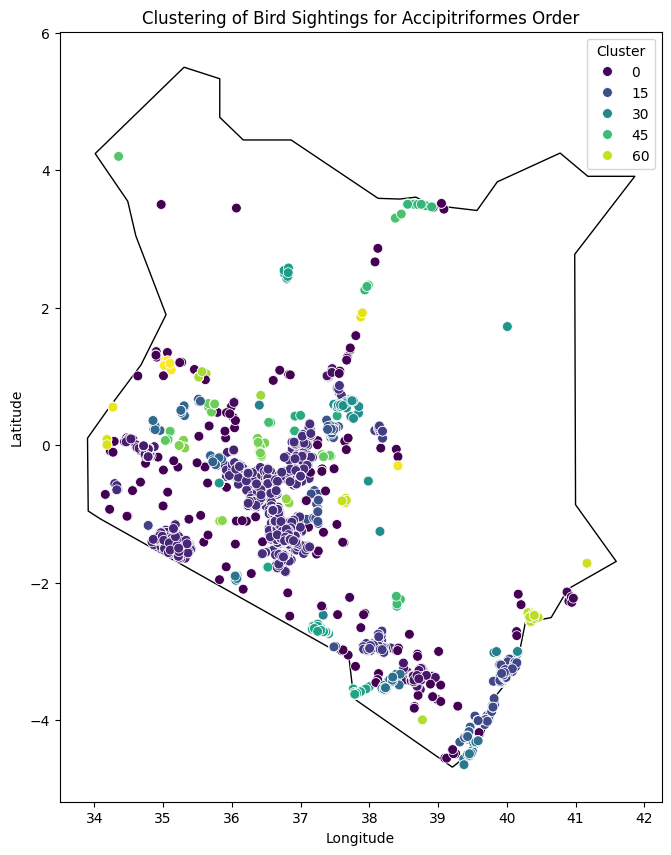

In [8]:
# Plot clusters for each bird order
for order in orders:
    plot_order_clusters(order)
    break
